In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'wd':[]}

In [4]:
lr = 1.0e-5
weight_decays = [0.01, 0.1]

for wd in weight_decays:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, wd: {wd}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, learning rate 1e-05, wd: 0.01


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	2.0418	Val Loss:	1.8658	Accuracy:	0.3787	F1:	0.2013
2 / 20: Train Loss:	1.7031	Val Loss:	1.5799	Accuracy:	0.5266	F1:	0.3367
3 / 20: Train Loss:	1.4068	Val Loss:	1.3784	Accuracy:	0.5740	F1:	0.3925
4 / 20: Train Loss:	1.1531	Val Loss:	1.2321	Accuracy:	0.6479	F1:	0.4619
5 / 20: Train Loss:	0.9570	Val Loss:	1.1178	Accuracy:	0.6598	F1:	0.4858
6 / 20: Train Loss:	0.7744	Val Loss:	1.0423	Accuracy:	0.6538	F1:	0.4974
7 / 20: Train Loss:	0.6212	Val Loss:	0.9971	Accuracy:	0.6627	F1:	0.5577
8 / 20: Train Loss:	0.4975	Val Loss:	0.9763	Accuracy:	0.6923	F1:	0.6385
9 / 20: Train Loss:	0.3897	Val Loss:	0.9759	Accuracy:	0.6893	F1:	0.6522
10 / 20: Train Loss:	0.3140	Val Loss:	0.9643	Accuracy:	0.7012	F1:	0.6469
11 / 20: Train Loss:	0.2618	Val Loss:	1.0011	Accuracy:	0.6923	F1:	0.6513
12 / 20: Train Loss:	0.2186	Val Loss:	1.0744	Accuracy:	0.6893	F1:	0.6300
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	2.0418	Val Loss:	1.8659	Accuracy:	0.3787	F1:	0.2013
2 / 20: Train Loss:	1.7035	Val Loss:	1.5827	Accuracy:	0.5178	F1:	0.3295
3 / 20: Train Loss:	1.4051	Val Loss:	1.3799	Accuracy:	0.5710	F1:	0.3827
4 / 20: Train Loss:	1.1511	Val Loss:	1.2403	Accuracy:	0.6361	F1:	0.4504
5 / 20: Train Loss:	0.9605	Val Loss:	1.1213	Accuracy:	0.6509	F1:	0.4796
6 / 20: Train Loss:	0.7800	Val Loss:	1.0416	Accuracy:	0.6568	F1:	0.4982
7 / 20: Train Loss:	0.6222	Val Loss:	0.9939	Accuracy:	0.6746	F1:	0.5636
8 / 20: Train Loss:	0.4985	Val Loss:	0.9598	Accuracy:	0.7012	F1:	0.6387
9 / 20: Train Loss:	0.3881	Val Loss:	0.9595	Accuracy:	0.6805	F1:	0.6192
10 / 20: Train Loss:	0.3111	Val Loss:	0.9623	Accuracy:	0.6893	F1:	0.6338
11 / 20: Train Loss:	0.2528	Val Loss:	0.9523	Accuracy:	0.7071	F1:	0.6732
12 / 20: Train Loss:	0.2128	Val Loss:	1.0043	Accuracy:	0.7041	F1:	0.6673
13 / 20: Train Loss:	0.1923	Val Loss:	1.1531	Accuracy:	0.6391	F1:	0.5666
14 / 20: Train Loss:	0.1628	Val Loss:	0.9999	Accuracy:	0.707

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

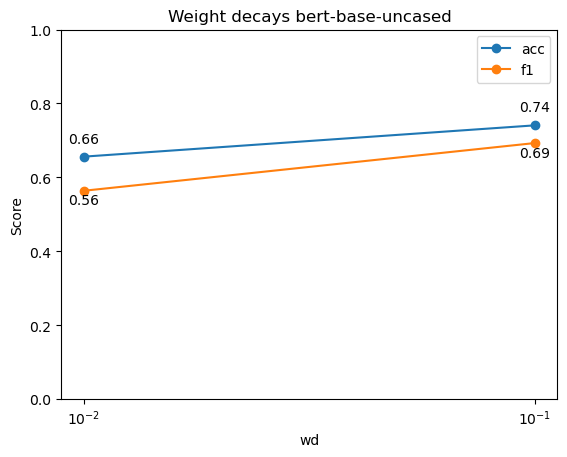

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='wd', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["wd"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["wd"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['wd'], [f'{val:.0e}' for val in df['wd']], ha='center')
    plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('wd')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Weight decays {model_checkpoint}')